In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_olivetti_faces
from sklearn.datasets import fetch_lfw_people

print("Loading Olivetti Faces dataset...")
faces_data = fetch_olivetti_faces()
faces_images = faces_data.images  # شکل: (400, 64, 64)
faces_target = faces_data.target  # لیبل‌ها

Loading Olivetti Faces dataset...


Dataset shape: (400, 64, 64)
Number of people: 40


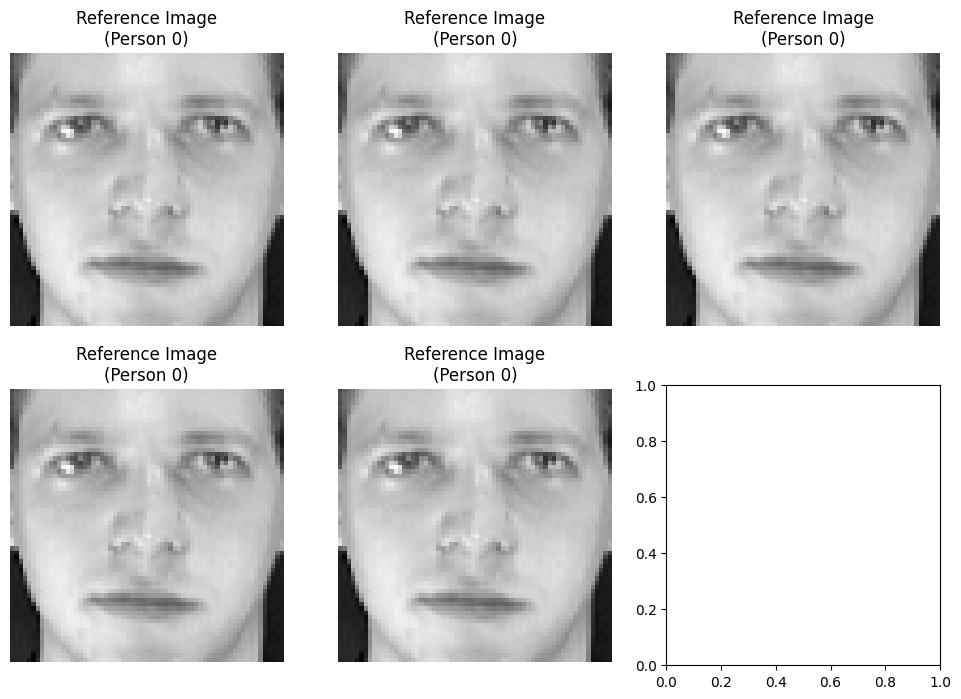

In [3]:

print(f"Dataset shape: {faces_images.shape}")
print(f"Number of people: {len(np.unique(faces_target))}")

# انتخاب تصویر مرجع و چند تصویر ورودی برای تست
reference_img = faces_images[0]  # تصویر مرجع
input_imgs = faces_images[1:6]  # 5 تصویر ورودی برای تست

# نمایش تصاویر
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.ravel()
# نمایش تصاویر
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.ravel()

# نمایش تصویر مرجع (فقط یک بار)
axes[0].imshow(reference_img, cmap="gray")
axes[0].set_title("Reference Image\n(Person 0)")
axes[0].axis('off')

# نمایش تصاویر ورودی (هر کدوم توی axes جداگانه)
# نمایش تصاویر ورودی
for i in range(5):
    axes[i + 1].imshow(input_imgs[i], cmap="gray")
    axes[i + 1].set_title(f"Input Image {i + 1}\n(Person {faces_target[i + 1]})")
    axes[i + 1].axis('off')

plt.tight_layout()
plt.show()


In [6]:

# PART 2: Calculate MSE
def calculate_mse(img1, img2):
    """محاسبه Mean Squared Error بین دو تصویر"""
    return np.mean((img1 - img2) ** 2)


# محاسبه MSE برای هر تصویر ورودی
mse_values = []
for i, img in enumerate(input_imgs):
    mse = calculate_mse(reference_img, img)
    mse_values.append(mse)
    print(f"MSE between reference and input_{i + 1}: {mse:.6f}")


<Figure size 640x480 with 0 Axes>

In [7]:

# PART 3: Display results
print(f"\nAverage MSE: {np.mean(mse_values):.6f}")
print(f"Min MSE: {np.min(mse_values):.6f}")
print(f"Max MSE: {np.max(mse_values):.6f}")

# PART 4: Save results in DataFrame and plot
df_comparison = pd.DataFrame({
    "Image": [f"Input_{i + 1}" for i in range(5)],
    "Person_ID": faces_target[1:6],
    "MSE": mse_values
})

print("\nComparative Analysis Results:")
print(df_comparison)

# نمودار میلهای MSE
plt.figure(figsize=(10, 6))
bars = plt.bar(df_comparison["Image"], df_comparison["MSE"],
               color='lightcoral', edgecolor='black', alpha=0.7)

# اضاف
# ه کردن مقادیر روی نمودار
for bar, value in zip(bars, df_comparison["MSE"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.001,
             f'{value:.4f}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Input Images')
plt.ylabel('MSE Value')
plt.title('MSE Comparison Between Input Images and Reference')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# دیتاست بزرگ‌تر با چهره‌های معروف
print("Loading LFW dataset...")
lfw_people = fetch_lfw_people(min_faces_per_person=20, resize=0.4)
lfw_images = lfw_people.images
lfw_target = lfw_people.target

print(f"LFW dataset shape: {lfw_images.shape}")
print(f"Number of people in LFW: {len(np.unique(lfw_target))}")


MSE between reference and input_1: 0.039372
MSE between reference and input_2: 0.010589
MSE between reference and input_3: 0.051810
MSE between reference and input_4: 0.027242
MSE between reference and input_5: 0.033053



Average MSE: 0.032413
Min MSE: 0.010589
Max MSE: 0.051810

Comparative Analysis Results:
     Image  Person_ID       MSE
0  Input_1          0  0.039372
1  Input_2          0  0.010589
2  Input_3          0  0.051810
3  Input_4          0  0.027242
4  Input_5          0  0.033053


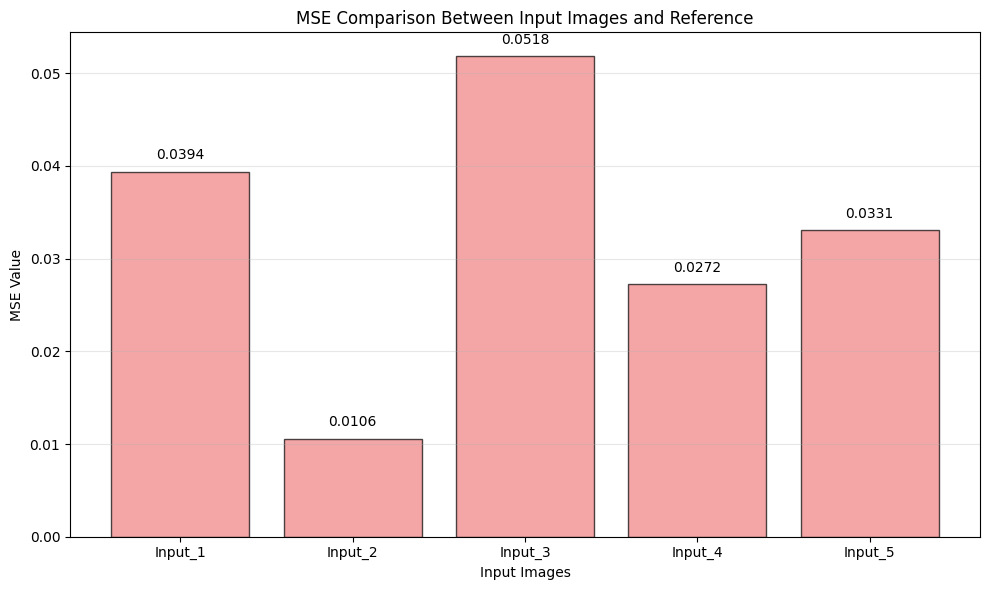

Loading LFW dataset...



KeyboardInterrupt



In [8]:

# PART 3: Display results
print(f"\nAverage MSE: {np.mean(mse_values):.6f}")
print(f"Min MSE: {np.min(mse_values):.6f}")
print(f"Max MSE: {np.max(mse_values):.6f}")

# PART 4: Save results in DataFrame and plot
df_comparison = pd.DataFrame({
    "Image": [f"Input_{i + 1}" for i in range(5)],
    "Person_ID": faces_target[1:6],
    "MSE": mse_values
})

print("\nComparative Analysis Results:")
print(df_comparison)

# نمودار میلهای MSE
plt.figure(figsize=(10, 6))
bars = plt.bar(df_comparison["Image"], df_comparison["MSE"],
               color='lightcoral', edgecolor='black', alpha=0.7)

# اضاف
# ه کردن مقادیر روی نمودار
for bar, value in zip(bars, df_comparison["MSE"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.001,
             f'{value:.4f}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Input Images')
plt.ylabel('MSE Value')
plt.title('MSE Comparison Between Input Images and Reference')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# دیتاست بزرگ‌تر با چهره‌های معروف
print("Loading LFW dataset...")
lfw_people = fetch_lfw_people(min_faces_per_person=20, resize=0.4)
lfw_images = lfw_people.images
lfw_target = lfw_people.target

print(f"LFW dataset shape: {lfw_images.shape}")
print(f"Number of people in LFW: {len(np.unique(lfw_target))}")
